<a href="https://colab.research.google.com/github/adam-bozman/RoboAdvisor/blob/main/M%26ARoboAdvisorAnalysis_070324_Insample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GPT4's Predictive Capacity | Value Enhancing

## Insample Setup

In [ ]:
# Load Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Import libraries
import pandas as pd
import re
from scipy import stats

In [ ]:
# Load the Excel file
file_path = "/content/drive/My Drive/RoboAdvisor/07_2024/MASample.xlsx"
sheet_name = 'insampleresults'
df = pd.read_excel(file_path, sheet_name=sheet_name)

In [ ]:
df.head()

,Source.Name,dealno,anndate,Target,Acquirer,effdate,withdate,form,pct_cash,pct_other,...,Acquirer List,aCAR_MM_Window1_1_1,aCAR_MM_Window2_2_2,aCAR_RAW_Window1_1_1,aCAR_RAW_Window2_2_2,tCAR_MM_Window1_1_20,tCAR_MM_Window2_1_63,tCAR_RAW_Window1_1_20,tCAR_RAW_Window2_1_63,Prompt_1_Response
0,ValueEnhancingInsample1.xlsx,3294810020,2018-10-01,HomeTown Bankshares Corp,American National Bankshares,2019-04-01,NaT,Merger,NaN,NaN,...,NaN,-0.039396,-0.039750,-0.039368,-0.036259,0.088359,0.029228,0.113046,0.098265,Decrease\n\n1. Dilution of Shares: If the acqu...
1,ValueEnhancingInsample1.xlsx,3294821040,2018-10-01,Transnorm System GmbH,Honeywell International Inc,NaT,NaT,Acq. of Assets,NaN,NaN,...,NaN,0.015681,0.005414,0.015118,0.008790,NaN,NaN,NaN,NaN,Increase\n\n1. Synergies: Honeywell Internatio...
2,ValueEnhancingInsample1.xlsx,3294748020,2018-10-01,Cianna Medical Inc,Merit Medical Systems Inc,NaT,NaT,Merger,67.5,32.5,...,NaN,0.080678,0.072407,0.082947,0.080487,NaN,NaN,NaN,NaN,Increase\n\n1. Synergies: If Merit Medical Sys...
3,ValueEnhancingInsample1.xlsx,3294865020,2018-10-01,Hyperbr Med Tech Inc,Stryker Corp,2018-10-01,NaT,Acq. of Assets,100.0,NaN,...,NaN,0.012761,-0.005611,0.013433,0.000227,NaN,NaN,NaN,NaN,Decrease\n\n1. Dilution of Shares: If Stryker ...
4,ValueEnhancingInsample1.xlsx,3301675020,2018-10-02,Mardi Gras Transp Sys Co Llc,BP Midstream Partners LP,2018-10-02,NaT,Acq. Maj. Int.,100.0,NaN,...,NaN,0.015513,0.000456,0.019234,-0.001876,NaN,NaN,NaN,NaN,Increase\n\n1. Synergies: BP Midstream Partner...


## Functions to Parse Answers

In [ ]:
# Function to process each response
def process_response(response):
    # Initialize result dictionary
    result = {'Primary_Response': 'Invalid Response', 'Reasons': ''}

    # Strip leading/trailing whitespace and split response into lines
    lines = response.strip().split('\n')

    # Extract primary response
    if lines:
        primary_response = lines[0].strip().lower().replace('*', '')  # Remove asterisks and strip whitespace
        primary_response = primary_response.strip("'\"")  # Remove leading/trailing quotation marks
        if primary_response in ['increase', 'decrease', 'no change']:
            result['Primary_Response'] = primary_response.capitalize()

    # Extract reasons only if the primary response is valid
    if result['Primary_Response'] != 'Invalid Response':
        reasons = []
        for line in lines[1:]:
            cleaned_line = line.strip().replace('*', '')  # Remove asterisks and strip whitespace
            match = re.match(r'^\d+\.\s([^:]+):', cleaned_line)
            if match:
                reasons.append(match.group(1).strip())
        if reasons:
            result['Reasons'] = '; '.join(reasons)

    return result

In [ ]:
# Apply the function to the Prompt_1_Response column
df[['Primary_Response', 'Reasons']] = df['Prompt_1_Response'].apply(lambda x: pd.Series(process_response(x)))

In [ ]:
df.head()

,Source.Name,dealno,anndate,Target,Acquirer,effdate,withdate,form,pct_cash,pct_other,...,aCAR_MM_Window2_2_2,aCAR_RAW_Window1_1_1,aCAR_RAW_Window2_2_2,tCAR_MM_Window1_1_20,tCAR_MM_Window2_1_63,tCAR_RAW_Window1_1_20,tCAR_RAW_Window2_1_63,Prompt_1_Response,Primary_Response,Reasons
0,ValueEnhancingInsample1.xlsx,3294810020,2018-10-01,HomeTown Bankshares Corp,American National Bankshares,2019-04-01,NaT,Merger,NaN,NaN,...,-0.039750,-0.039368,-0.036259,0.088359,0.029228,0.113046,0.098265,Decrease\n\n1. Dilution of Shares: If the acqu...,Decrease,Dilution of Shares; Integration Risks; Financi...
1,ValueEnhancingInsample1.xlsx,3294821040,2018-10-01,Transnorm System GmbH,Honeywell International Inc,NaT,NaT,Acq. of Assets,NaN,NaN,...,0.005414,0.015118,0.008790,NaN,NaN,NaN,NaN,Increase\n\n1. Synergies: Honeywell Internatio...,Increase,Synergies; Expansion of Product Portfolio; Mar...
2,ValueEnhancingInsample1.xlsx,3294748020,2018-10-01,Cianna Medical Inc,Merit Medical Systems Inc,NaT,NaT,Merger,67.5,32.5,...,0.072407,0.082947,0.080487,NaN,NaN,NaN,NaN,Increase\n\n1. Synergies: If Merit Medical Sys...,Increase,Synergies; Market Expansion; Competitive Advan...
3,ValueEnhancingInsample1.xlsx,3294865020,2018-10-01,Hyperbr Med Tech Inc,Stryker Corp,2018-10-01,NaT,Acq. of Assets,100.0,NaN,...,-0.005611,0.013433,0.000227,NaN,NaN,NaN,NaN,Decrease\n\n1. Dilution of Shares: If Stryker ...,Decrease,Dilution of Shares; Integration Risks; Financi...
4,ValueEnhancingInsample1.xlsx,3301675020,2018-10-02,Mardi Gras Transp Sys Co Llc,BP Midstream Partners LP,2018-10-02,NaT,Acq. Maj. Int.,100.0,NaN,...,0.000456,0.019234,-0.001876,NaN,NaN,NaN,NaN,Increase\n\n1. Synergies: BP Midstream Partner...,Increase,Synergies; Diversification; Financial Performa...


## Save the Output

In [ ]:
# Set path variables
path_to_google_drive = '/content/drive/My Drive/RoboAdvisor/07_2024/results/Cleaned/'
filename = 'ValueEnhancingResponses_Cleaned_Insample.xlsx'

# Define global path
path = path_to_google_drive + filename

# Save the cleaned and updated dataframe to a new Excel file
df.to_excel(path, index=False)

## Statistical Significance & Accuracy of Responses

In [ ]:
# Filter out rows with empty CAR values
car_columns = ['aCAR_MM_Window1_1_1', 'aCAR_MM_Window2_2_2', 'aCAR_RAW_Window1_1_1', 'aCAR_RAW_Window2_2_2']
df = df.dropna(subset=car_columns)

In [ ]:
# Calculate average returns for each response category
response_groups = df.groupby('Primary_Response')[car_columns].mean()

In [ ]:
# Calculate statistical significance
response_results = {}
for response in df['Primary_Response'].unique():
    if response != 'Invalid Response':
        subset = df[df['Primary_Response'] == response]
        stats_results = {}
        for col in car_columns:
            stats_results[col] = {
                'mean': subset[col].mean(),
                'std': subset[col].std(),
                'count': subset[col].count(),
                't-stat': stats.ttest_1samp(subset[col].dropna(), 0).statistic,
                'p-value': stats.ttest_1samp(subset[col].dropna(), 0).pvalue
            }
        response_results[response] = stats_results

# Print the results
for response, results in response_results.items():
    print(f"Results for {response}:")
    for col, stats in results.items():
        print(f"  {col}: mean={stats['mean']}, std={stats['std']}, count={stats['count']}, t-stat={stats['t-stat']}, p-value={stats['p-value']}")

Results for Decrease:
  aCAR_MM_Window1_1_1: mean=-0.007214410738536887, std=0.0901276579269765, count=382, t-stat=-1.5644960114920037, p-value=0.11853130464953589
  aCAR_MM_Window2_2_2: mean=-0.00806049633329573, std=0.09241705351187697, count=382, t-stat=-1.7046740429513745, p-value=0.08907044360419647
  aCAR_RAW_Window1_1_1: mean=-0.005948706112999277, std=0.09253070477373783, count=382, t-stat=-1.2565168739962687, p-value=0.20969847567024022
  aCAR_RAW_Window2_2_2: mean=-0.004206237075686034, std=0.09644021056298996, count=382, t-stat=-0.852446787946433, p-value=0.39450169184546835
Results for Increase:
  aCAR_MM_Window1_1_1: mean=0.017402752371886706, std=0.09697994291689095, count=1343, t-stat=6.576185008110809, p-value=6.896155816357603e-11
  aCAR_MM_Window2_2_2: mean=0.01839621025636183, std=0.10872824342909973, count=1343, t-stat=6.200461270819367, p-value=7.480066493772538e-10
  aCAR_RAW_Window1_1_1: mean=0.020178616943951497, std=0.09885315634996789, count=1343, t-stat=7.480

## Functions to Aggregate Common Reasons/Terms

In [ ]:
# Load libraries
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
# Function to calculate reason frequencies
def calculate_reason_frequencies(reasons):
    all_reasons = '; '.join(reasons).split('; ')
    reason_freq = Counter(all_reasons)
    return reason_freq

# Function to plot word cloud
def plot_wordcloud(freq_dict, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=15)
    plt.axis('off')
    plt.show()

In [ ]:
# Separate data into value-enhancing and non-value-enhancing deals
value_enhancing = df[df['Primary_Response'] == 'Increase']
non_value_enhancing = df[df['Primary_Response'].isin(['Decrease', 'No change'])]

In [ ]:
# Calculate reason frequencies for each group
full_sample_reason_freq = calculate_reason_frequencies(df['Reasons'])
value_enhancing_reason_freq = calculate_reason_frequencies(value_enhancing['Reasons'])
non_value_enhancing_reason_freq = calculate_reason_frequencies(non_value_enhancing['Reasons'])

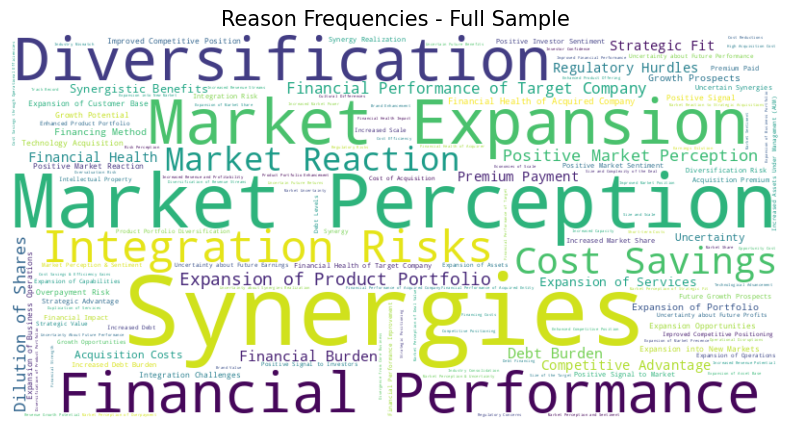

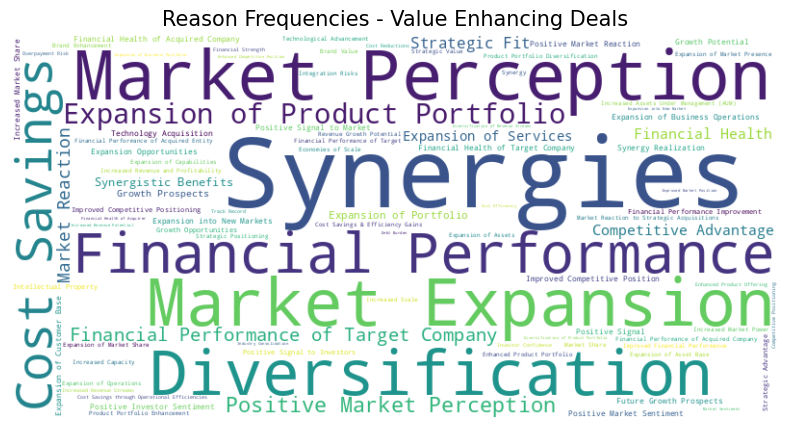

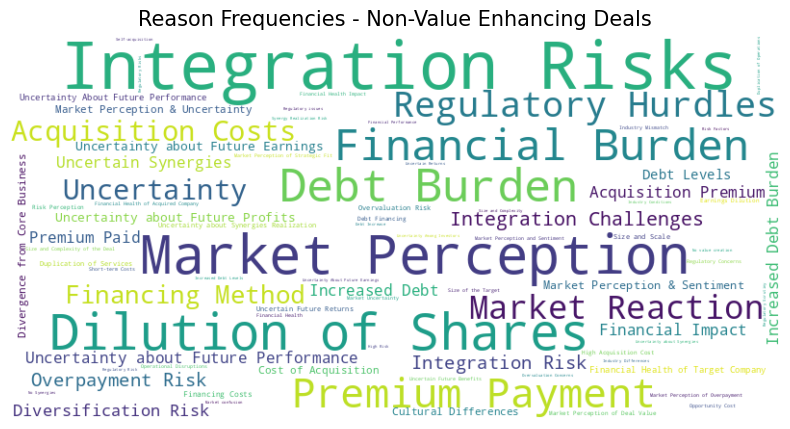

In [ ]:
# Plot word clouds for each group
plot_wordcloud(full_sample_reason_freq, 'Reason Frequencies - Full Sample')
plot_wordcloud(value_enhancing_reason_freq, 'Reason Frequencies - Value Enhancing Deals')
plot_wordcloud(non_value_enhancing_reason_freq, 'Reason Frequencies - Non-Value Enhancing Deals')

In [ ]:
# Optionally, print the most common reasons for each group
print("Most common reasons - Full Sample:", full_sample_reason_freq.most_common(20))
print("Most common reasons - Value Enhancing Deals:", value_enhancing_reason_freq.most_common(20))
print("Most common reasons - Non-Value Enhancing Deals:", non_value_enhancing_reason_freq.most_common(20))

Most common reasons - Full Sample: [('Synergies', 1229), ('Market Perception', 690), ('Market Expansion', 463), ('Diversification', 435), ('Financial Performance', 374), ('Integration Risks', 318), ('Cost Savings', 284), ('Market Reaction', 226), ('Expansion of Product Portfolio', 179), ('Positive Market Perception', 167), ('Dilution of Shares', 166), ('Financial Performance of Target Company', 150), ('Debt Burden', 136), ('Financial Burden', 127), ('Premium Payment', 111), ('Strategic Fit', 111), ('Regulatory Hurdles', 109), ('Financial Health', 105), ('Competitive Advantage', 102), ('Expansion of Services', 83)]
Most common reasons - Value Enhancing Deals: [('Synergies', 1229), ('Market Perception', 495), ('Market Expansion', 463), ('Diversification', 435), ('Financial Performance', 372), ('Cost Savings', 284), ('Expansion of Product Portfolio', 179), ('Positive Market Perception', 167), ('Financial Performance of Target Company', 150), ('Market Reaction', 135), ('Strategic Fit', 110

## Create a Dataframe of `Reasons`

In [ ]:
# Create a DataFrame for the most common reasons
common_reasons = list(set(list(full_sample_reason_freq.keys()) + list(value_enhancing_reason_freq.keys()) + list(non_value_enhancing_reason_freq.keys())))

data = {
    'Reason': common_reasons,
    'Full Sample': [full_sample_reason_freq.get(reason, 0) for reason in common_reasons],
    'Value Enhancing Deals': [value_enhancing_reason_freq.get(reason, 0) for reason in common_reasons],
    'Non-Value Enhancing Deals': [non_value_enhancing_reason_freq.get(reason, 0) for reason in common_reasons]
}

df_common_reasons = pd.DataFrame(data)
df_common_reasons = df_common_reasons.sort_values(by='Full Sample', ascending=False)

In [ ]:
# Display the DataFrame
df_common_reasons.head()

,Reason,Full Sample,Value Enhancing Deals,Non-Value Enhancing Deals
406,Synergies,1229,1229,0
204,Market Perception,690,495,195
290,Market Expansion,463,463,0
180,Diversification,435,435,0
52,Financial Performance,374,372,2


## Save the Output

In [ ]:
# Save the DataFrame to an Excel file
output_file_path = '/content/drive/My Drive/RoboAdvisor/07_2024/results/Cleaned/ValueEnhancingReasonsInsample.xlsx'
df_common_reasons.to_excel(output_file_path, index=False)